# Iris Flower Classification with Machine Learning

**Objective**: This notebook aims to train a machine learning model to classify Iris flowers into three species (Setosa, Versicolor, Virginica) using the Iris dataset.

**Steps**:
1. Load and explore the dataset.
2. Preprocess the data.
3. Perform exploratory data analysis (EDA).
4. Train and evaluate multiple models using cross-validation.
5. Perform hyperparameter tuning for the best model.
6. Save the best model for future use.
7. Visualize results and feature importance.

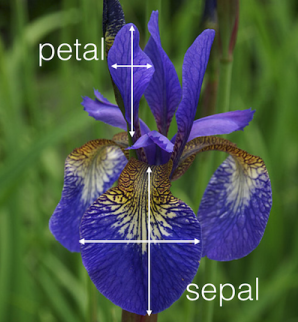

# 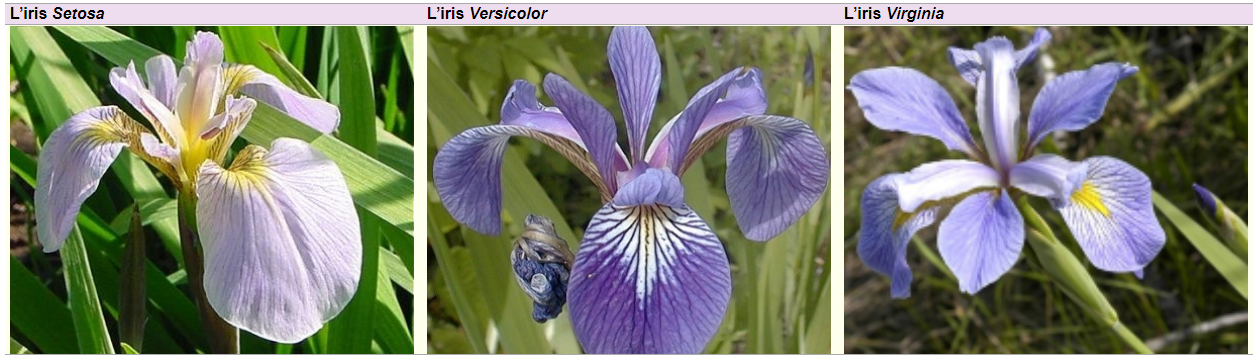

# Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib
!pip install shap
import shap

# Set styles for visualizations
sns.set(style="whitegrid")
plt.style.use('seaborn')

# Load the IRIS Dataset

In [3]:
# Load the dataset from CSV
df = pd.read_csv('IRIS.csv')

# Display first few rows
print("First few rows of the dataset:")
display(df.head())

# Dataset information
print("\nDataset information:")
df.info()

First few rows of the dataset:


sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# display basics states of the data 
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

## Data Preprocessing

In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


# Encode target variable
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])


# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Training set size: (120, 4)
Testing set size: (30, 4)


# Exploratory Data Analysis (EDA)

In [6]:
# Descriptive statistics
display(df.describe())

sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

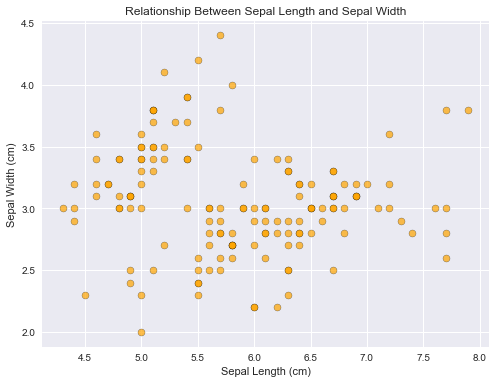

In [7]:
# Scatter plot to visualize the relationship between sepal_length and sepal_width
plt.figure(figsize=(8, 6))
plt.scatter(df['sepal_length'], df['sepal_width'], alpha=0.7, color='orange', edgecolor='black')
plt.title('Relationship Between Sepal Length and Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(True)
plt.show()

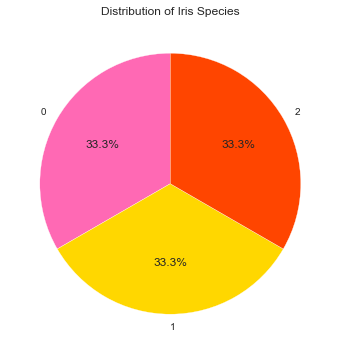

In [8]:
# Count the number of samples for each species
species_counts = df['species'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, colors=['#FF69B4', '#FFD700', '#FF4500'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Iris Species')
plt.show()

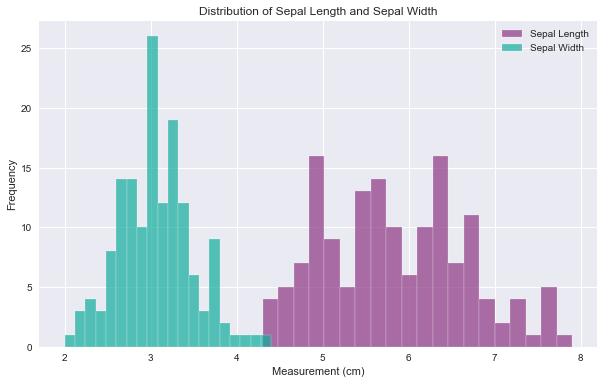

In [9]:
# Histogram to visualize the distributions of sepal_length and sepal_width
plt.figure(figsize=(10, 6))
plt.hist(df['sepal_length'], alpha=0.7, color='#8C3582', bins=20, label='Sepal Length')
plt.hist(df['sepal_width'], alpha=0.7, color='#10AD9D', bins=20, label='Sepal Width')
plt.title('Distribution of Sepal Length and Sepal Width')
plt.xlabel('Measurement (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

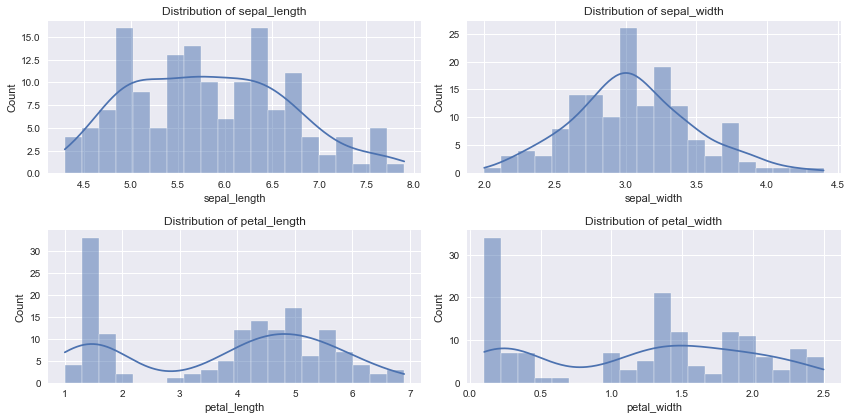

In [10]:
# Visualizing feature distributions
plt.figure(figsize=(12, 6))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

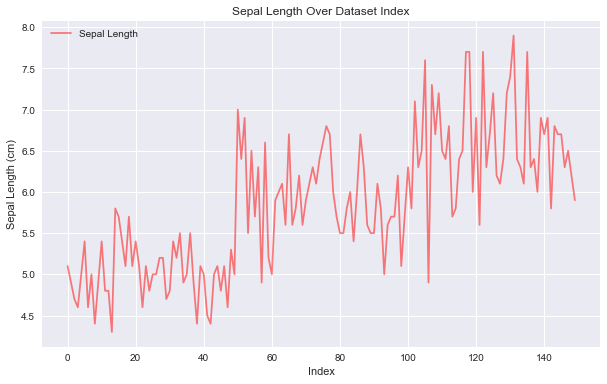

In [11]:
# Line plot to visualize sepal_length values
plt.figure(figsize=(10, 6))
plt.plot(df['sepal_length'], alpha=0.5, label='Sepal Length', color='red')
plt.title('Sepal Length Over Dataset Index')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.grid(True)
plt.show()

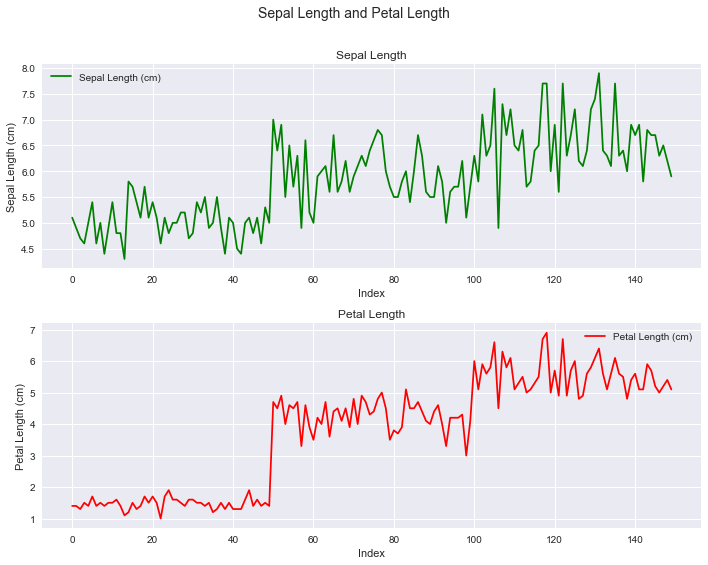

In [12]:
# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Sepal Length and Petal Length', fontsize=14)

# Plot sepal_length in the first subplot
ax[0].plot(df['sepal_length'], color='green', label='Sepal Length (cm)')
ax[0].set_title('Sepal Length')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Sepal Length (cm)')
ax[0].legend()
ax[0].grid(True)

# Plot petal_length in the second subplot
ax[1].plot(df['petal_length'], color='red', label='Petal Length (cm)')
ax[1].set_title('Petal Length')
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Petal Length (cm)')
ax[1].legend()
ax[1].grid(True)

# Adjust layout for better spacing
fig.tight_layout()
fig.subplots_adjust(top=0.88)  # Adjust top spacing for the suptitle
plt.show()

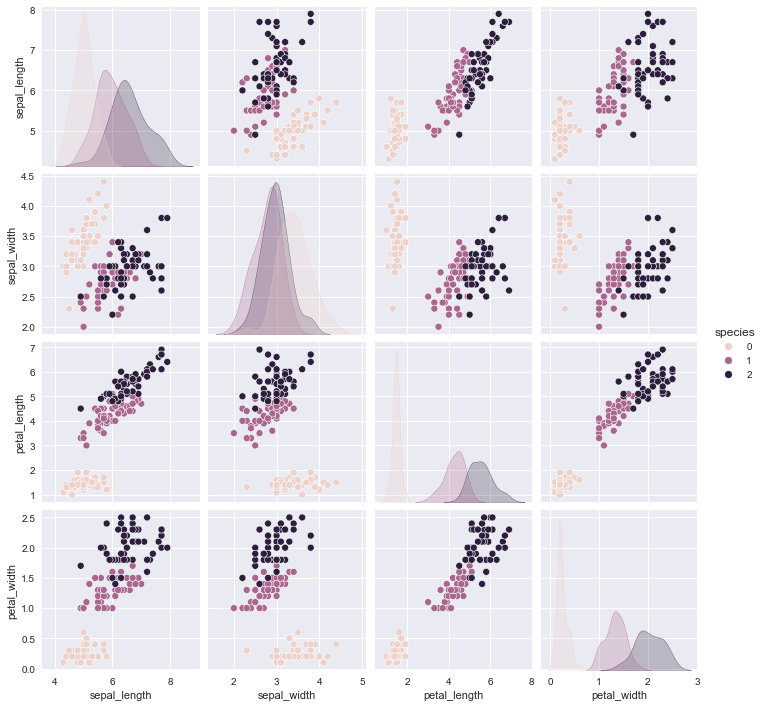

In [13]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='species')
plt.show()

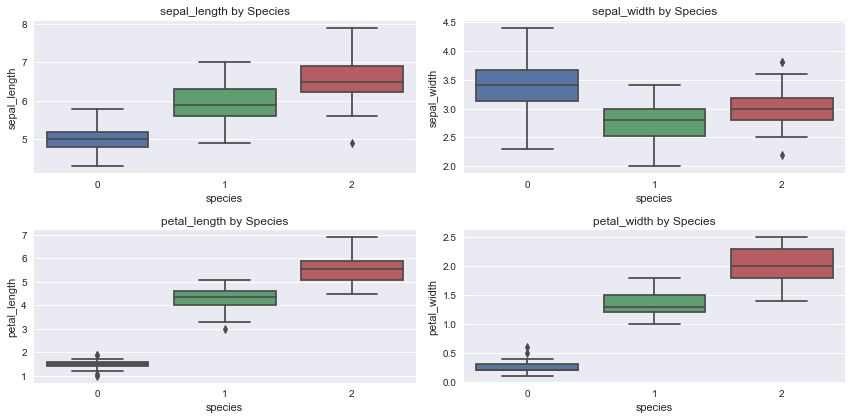

In [14]:
# Boxplots by species
plt.figure(figsize=(12, 6))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df['species'], y=df[feature])
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

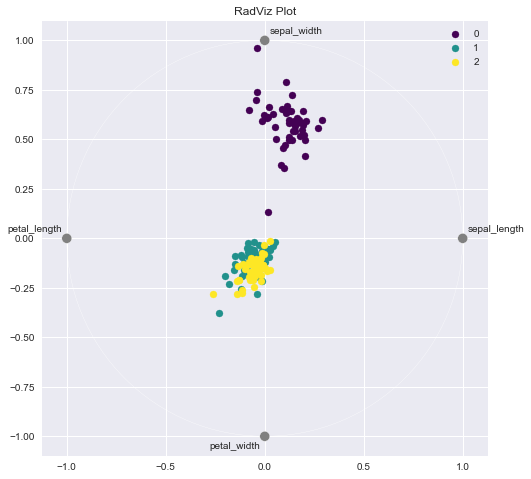

In [15]:
from pandas.plotting import radviz

# RadViz plot
plt.figure(figsize=(8, 8))
radviz(df, 'species', colormap='viridis')
plt.title('RadViz Plot')
plt.show()

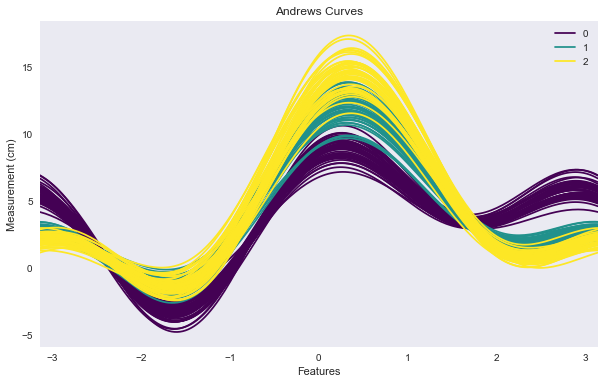

In [16]:
from pandas.plotting import andrews_curves

# Andrews curves plot
plt.figure(figsize=(10, 6))
andrews_curves(df, 'species', colormap='viridis')
plt.title('Andrews Curves')
plt.xlabel('Features')
plt.ylabel('Measurement (cm)')
plt.show()

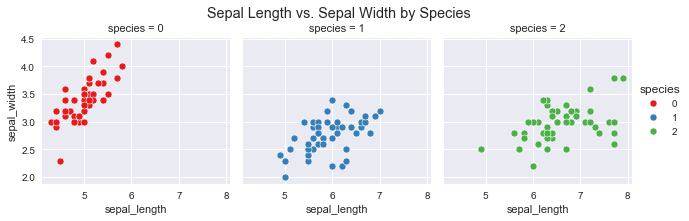

In [17]:
# FacetGrid for sepal_length vs. sepal_width by species
g = sns.FacetGrid(df, col='species', hue='species', palette='Set1')
g.map(sns.scatterplot, 'sepal_length', 'sepal_width')
g.add_legend()
plt.suptitle('Sepal Length vs. Sepal Width by Species', y=1.02)
plt.show()

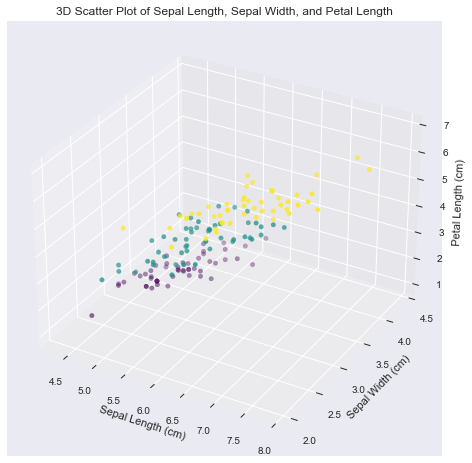

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot for sepal_length, sepal_width, and petal_length
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'], c=df['species'].astype('category').cat.codes, cmap='viridis')
ax.set_title('3D Scatter Plot of Sepal Length, Sepal Width, and Petal Length')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.show()

In [19]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_length', color='species', symbol='species', opacity=0.7)
fig.update_layout(title='Interactive 3D Scatter Plot of Iris Dataset')
fig.show()

In [20]:
# Interactive scatter plot with dropdown
fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species', title='Interactive Scatter Plot with Dropdown')
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(args=[{'x': [df['sepal_length']], 'y': [df['sepal_width']]}], label='Sepal Length vs. Sepal Width', method='update'),
                dict(args=[{'x': [df['petal_length']], 'y': [df['petal_width']]}], label='Petal Length vs. Petal Width', method='update'),
                dict(args=[{'x': [df['sepal_length']], 'y': [df['petal_length']]}], label='Sepal Length vs. Petal Length', method='update'),
                dict(args=[{'x': [df['sepal_width']], 'y': [df['petal_width']]}], label='Sepal Width vs. Petal Width', method='update')
            ]),
            direction='down',
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.1,
            yanchor='top'
        ),
    ]
)
fig.show()

In [21]:
# Interactive sunburst chart
fig = px.sunburst(df, path=['species', 'sepal_length'], values='sepal_width', color='petal_length')
fig.update_layout(title='Interactive Sunburst Chart')
fig.show()

D:\Users\DrissiOmar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

D:\Users\DrissiOmar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [22]:
# Interactive histogram
fig = px.histogram(df, x='sepal_length', color='species', nbins=20, marginal='rug')
fig.update_layout(title='Interactive Histogram of Sepal Length')
fig.show()

In [23]:
# Interactive violin plot
fig = px.violin(df, x='species', y='sepal_length', color='species', box=True, points='all')
fig.update_layout(title='Interactive Violin Plot of Sepal Length by Species')
fig.show()

<Figure size 576x432 with 0 Axes>

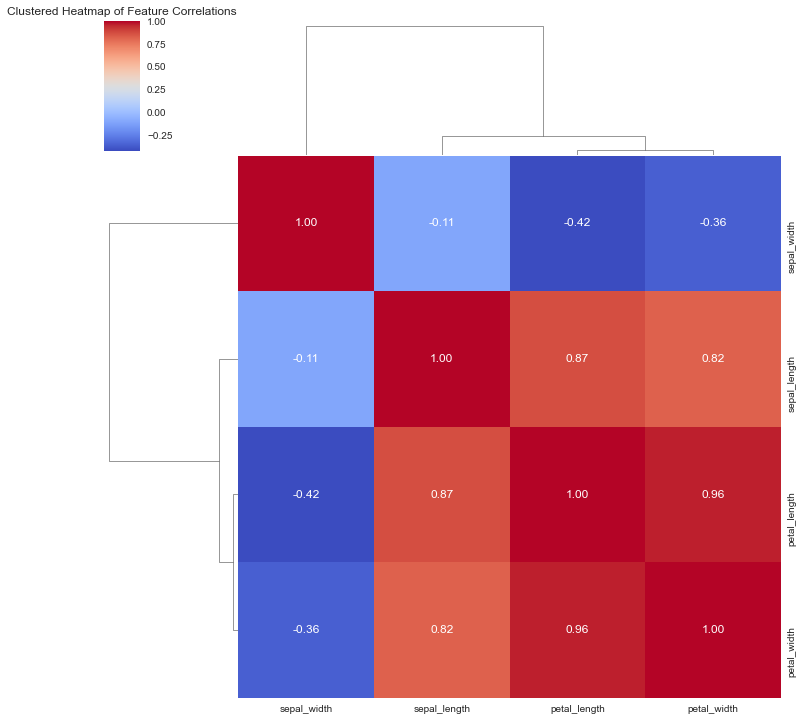

In [24]:
# Clustered heatmap
plt.figure(figsize=(8, 6))
sns.clustermap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Clustered Heatmap of Feature Correlations')
plt.show()

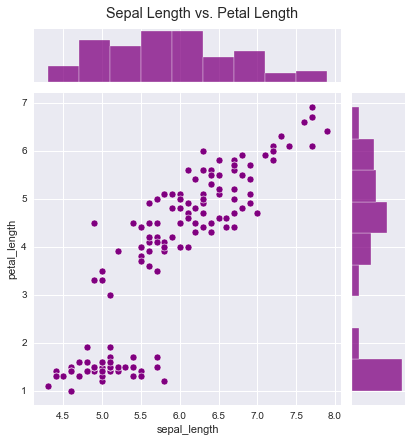

In [25]:
# Joint plot for sepal_length and petal_length
sns.jointplot(x='sepal_length', y='petal_length', data=df, kind='scatter', color='purple')
plt.suptitle('Sepal Length vs. Petal Length', y=1.02)
plt.show()

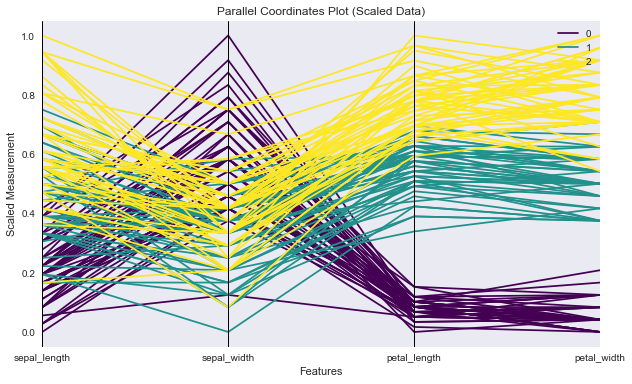

In [26]:
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('species', axis=1)), columns=df.columns[:-1])
df_scaled['species'] = df['species']

# Parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(df_scaled, 'species', colormap='viridis')
plt.title('Parallel Coordinates Plot (Scaled Data)')
plt.xlabel('Features')
plt.ylabel('Scaled Measurement')
plt.show()

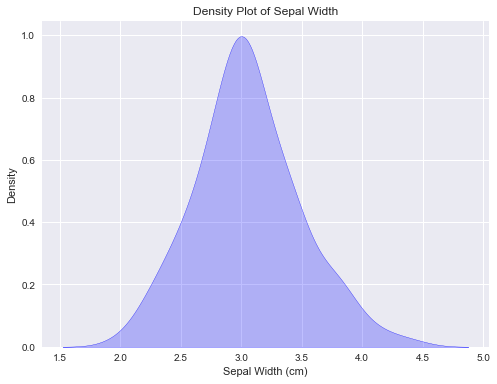

In [27]:
# Density plot for sepal_width
plt.figure(figsize=(8, 6))
sns.kdeplot(df['sepal_width'], shade=True, color='blue')
plt.title('Density Plot of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Density')
plt.show()

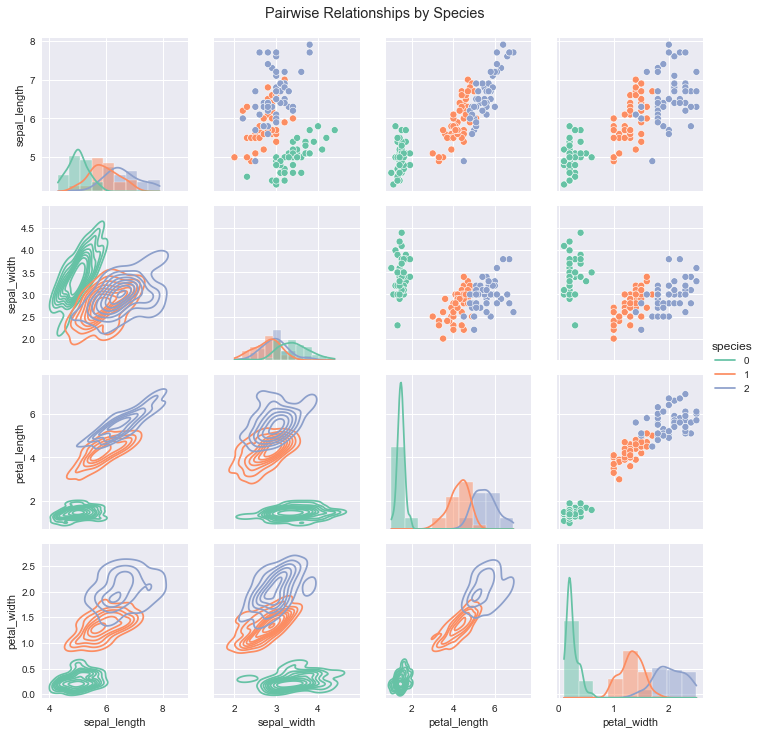

In [28]:
# PairGrid for pairwise relationships
g = sns.PairGrid(df, hue='species', palette='Set2')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
g.add_legend()
plt.suptitle('Pairwise Relationships by Species', y=1.02)
plt.show()

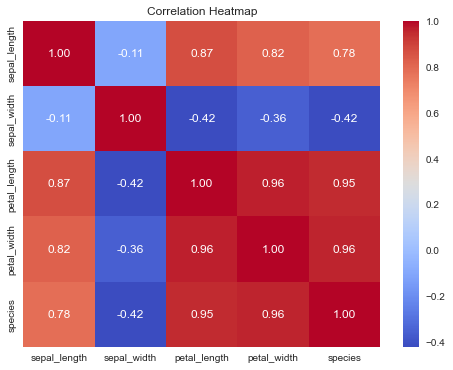

In [29]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Model Training and Evaluation

Model  Accuracy  Precision (Macro Avg)  Recall (Macro Avg)  \
0  Logistic Regression       1.0                    1.0                 1.0   
1        Decision Tree       1.0                    1.0                 1.0   
2                  SVM       1.0                    1.0                 1.0   
3  K-Nearest Neighbors       1.0                    1.0                 1.0   
4        Random Forest       1.0                    1.0                 1.0   

   F1-Score (Macro Avg)  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0

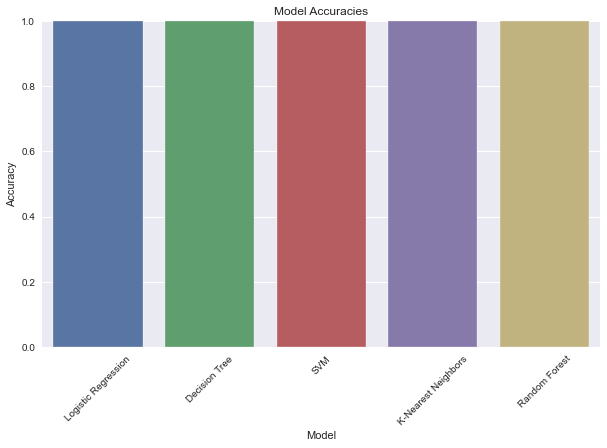

In [30]:
# Define models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Convert to dict for table format

    # Append results as a dictionary
    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 2),
        "Precision (Macro Avg)": round(report["macro avg"]["precision"], 2),
        "Recall (Macro Avg)": round(report["macro avg"]["recall"], 2),
        "F1-Score (Macro Avg)": round(report["macro avg"]["f1-score"], 2)
    })

# Convert to Pandas DataFrame for better display
results_df = pd.DataFrame(results)

# Display as a table
display(results_df.sort_values(by='Accuracy', ascending=False))

# Visualize model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df['Model'], y=results_df['Accuracy'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Cross-Validation for Better Model Evaluation

Model  Cross-Validation Accuracy
2                  SVM                   0.966667
0  Logistic Regression                   0.960000
3  K-Nearest Neighbors                   0.960000
4        Random Forest                   0.960000
1        Decision Tree                   0.953333

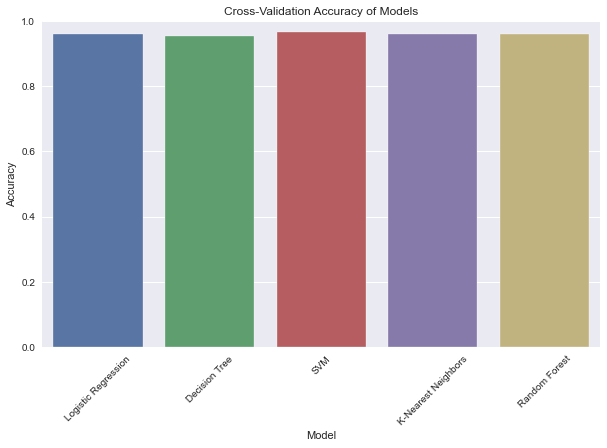

In [31]:
# Perform cross-validation for each model
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()

# Convert results to DataFrame for visualization
cv_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Cross-Validation Accuracy'])
display(cv_df.sort_values(by='Cross-Validation Accuracy', ascending=False))

# Plot cross-validation results
plt.figure(figsize=(10, 6))
sns.barplot(x=cv_df['Model'], y=cv_df['Cross-Validation Accuracy'])
plt.title('Cross-Validation Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Hyperparameter Tuning for the Best Model

In [32]:
# Identify the best model
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]
print(f'\nBest Model: {best_model_name} with Cross-Validation Accuracy: {cv_results[best_model_name]:.2f}')

# Hyperparameter tuning for the best model
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {best_model_name}: {grid_search.best_params_}")


Best Model: SVM with Cross-Validation Accuracy: 0.97


# Save the Best Model

In [33]:
# Save the best model and label encoder
joblib.dump((best_model, label_encoder), 'iris_model.pkl')
print("Model and Label Encoder saved as 'iris_model.pkl'")

Model and Label Encoder saved as 'iris_model.pkl'


# Additional Visualizations

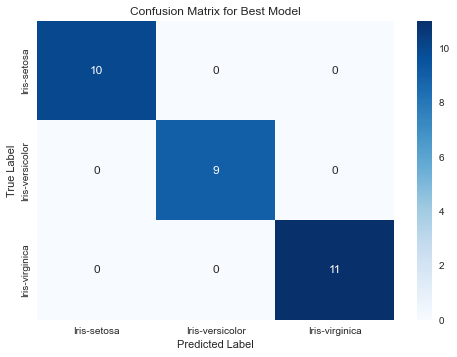

  0%|          | 0/30 [00:00<?, ?it/s]

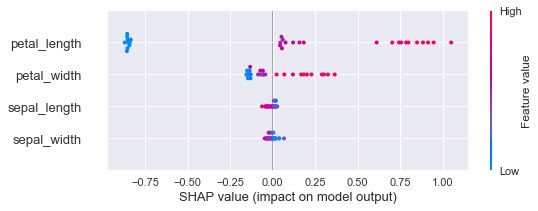

In [57]:
# Confusion Matrix for the Best Model
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance for Tree-Based Models
if best_model_name in ['Decision Tree', 'Random Forest']:
    plt.figure(figsize=(10, 6))
    feature_importances = best_model.feature_importances_
    sns.barplot(x=feature_importances, y=X.columns)
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# SHAP Summary Plot for Explainability
if best_model_name == 'SVM':
    # Summarize the background data using shap.sample or shap.kmeans
    background = shap.sample(X_train, 100)  # Or use shap.kmeans(X_train, 10)
    
    # Use KernelExplainer with the summarized background
    explainer = shap.KernelExplainer(best_model.predict, background)
    shap_values = explainer.shap_values(X_test)
    
    # Plot SHAP summary plot
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)
else:
    # Use TreeExplainer for tree-based models
    explainer = shap.Explainer(best_model, X_train)
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [35]:
# Conclusion
conclusion = f"""
## Conclusion

**Results:**
- The best model is **{best_model_name}** with a cross-validation accuracy of **{cv_results[best_model_name]:.2f}**.
- The model has been saved as `iris_model.pkl` for future use.

**Next Steps:**
- Integrate this model into a Flask application.
- Develop a user interface with Angular to interact with the model.
"""

# Display the conclusion
from IPython.display import Markdown
Markdown(conclusion)


## Conclusion

**Results:**
- The best model is **SVM** with a cross-validation accuracy of **0.97**.
- The model has been saved as `iris_model.pkl` for future use.

**Next Steps:**
- Integrate this model into a Flask application.
- Develop a user interface with Angular to interact with the model.
